In [1]:
# type:ignore
import time
import sys
import io
import pandas as pd

from gurobipy import *
from functions import *
from openpyxl import load_workbook

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
# parâmetros
instances = [
            #  'instancia1',
            #  'instancia2',
            #  'instancia3',
            #  'instancia4',
            #  'instancia5',
            #  'instancia6',
            #  'instancia7',
            #  'instancia8',
            #  'instancia9',
            #  'instancia10' 
            # 'instancia1.2'
            'test'
            ]

Qs = [561]#,637,563,561,561,565,491,493,563,493]

In [3]:
path_excel = '/home/wilmer/Documentos/Codes/tesis/Instancias/resumo.xlsx'
wb = load_workbook(path_excel)
hoja = wb.active

for instance in instances:
    
    path = '/home/wilmer/Documentos/Codes/tesis/Instancias/'+instance
    Q = Qs[instances.index(instance)]

    modelos = [
            #    BaseModel,
            #    BaseModel_Fulfillments,
            #    BaseModel_Skiplagging#,
               BaseModel_Fulfillments_Skiplagging#,

            #    HierarBehavioralModel,
            #    HierarBehavioralModel_Fulfillments,
            #    HierarBehavioralModel_Skiplagging,
            #    HierarBehavioralModel_Fulfillments_Skiplagging,

            #    PercentBehavioralModel,
            #    PercentBehavioralModel_Fulfillments,
            #    PercentBehavioralModel_Skiplagging,
            #    PercentBehavioralModel_Fulfillments_Skiplagging
            ]

    for classeModelo in modelos:

        # criar modelo
        start_time_cria_model = time.time()

        modelo = classeModelo(
            path_dem = path + '/demanda_e3_t3 copy.csv',
            path_preco = path + '/preco_e3.csv',
            path_rota1 = path + '/rota_e3.csv',
            Q = Q,
            perio = 0
        )

        model, A, X, Y, BY, BX, BL, P, d, perio, indexCombiDem = modelo.create_model()

        end_time_cria_model = time.time()


        # # Redigir a saída padrão para um arquivo
        # old_stdout = sys.stdout
        # new_stdout = io.StringIO()
        # sys.stdout = new_stdout

        print("tempo de criacao do modelo: ", end_time_cria_model - start_time_cria_model)

        # Optimizar o modelo
        start_time_opt = time.time()

        model.optimize()
        model.write(path+'/modelo.lp')
        end_time_opt = time.time()

        # Calcular tempos
        tempoCriacao = end_time_cria_model - start_time_cria_model
        tempoOpt = end_time_opt - start_time_opt

        if model.status == GRB.OPTIMAL:
            # Salvar solução
            a = save_solution(model, BX, BL, P, d, X, Y, A, BY, perio, classeModelo.__name__, indexCombiDem, path)

            print("Modelo: ", classeModelo.__name__)
            print("Instancia: ", instance)
            print("FO: ", model.ObjVal)
            print("FO Relaxada: ", model.ObjBound)
            print("Tempo Criação: ", tempoCriacao)
            print("Tempo da optimização: ", tempoOpt)
        else:
            print("Modelo: ", classeModelo.__name__)
            print("Instancia: ", instance)
            print("FO: ", "Infac")
            print("FO Relaxada: ", model.ObjBound)
            print("Tempo Criação: ", tempoCriacao)
            print("Tempo da optimização: ", tempoOpt)

        # # Voltar a saída padrão
        # sys.stdout = old_stdout

        # # Obter a saída da otimização
        # output = new_stdout.getvalue()

        # # Salvar a saída num arquivo de texto
        # with open( path + '/saidaExecucao'+ classeModelo.__name__ +'.txt', 'w') as f:
        #     f.write(output)

        # # Salvar em excel um resumo dos resultados
        # if model.status == GRB.OPTIMAL:
        #     hoja.append([instance, classeModelo.__name__, model.NumVars, tempoCriacao, tempoOpt, model.NodeCount, model.IterCount, model.SolCount, model.MIPGap, model.ObjBound, model.ObjVal])
        # else:
        #     hoja.append([instance, classeModelo.__name__, model.NumVars, tempoCriacao, tempoOpt, "-", "-", "-", "-", "-",'Infac'])
        # wb.save(path_excel)

        print("Termino a Instancia: " + instance + ", usando o modelo: " + classeModelo.__name__)

entro a hacer los subconjuntos:  1732919666.7615747
termino de hacer los subconjuntos:  1732919666.7617064
Set parameter Username
Academic license - for non-commercial use only - expires 2025-06-25
tempo de criacao do modelo:  0.1144418716430664
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (linux64 - "Ubuntu 24.04.1 LTS")

CPU model: AMD Ryzen 5 2500U with Radeon Vega Mobile Gfx, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 203 rows, 135 columns and 479 nonzeros
Model fingerprint: 0xd54f933a
Variable types: 0 continuous, 135 integer (63 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  Objective range  [9e+01, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+01, 6e+02]
Found heuristic solution: objective -0.0000000
Presolve removed 77 rows and 52 columns
Presolve time: 0.00s
Presolved: 126 rows, 83 columns, 340 nonzeros
Variable types: 0 continuous, 83 integer (44 

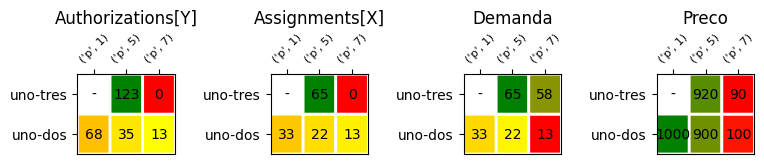

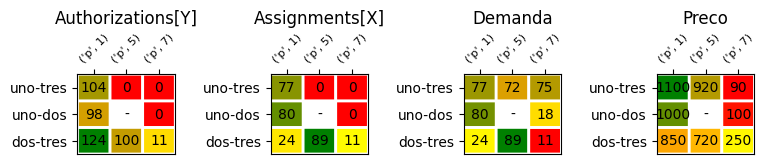

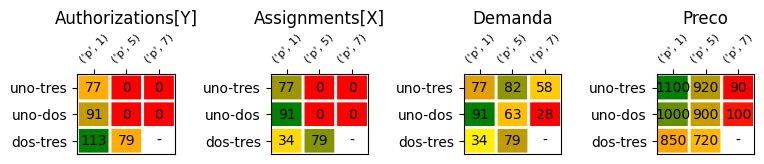

In [4]:
attrs = ['Authorizations[Y]','Assignments[X]','Demanda','Preco']

graf2 = grafica(a,attrs, 2, 8, 4, 2)
graf1 = grafica(a,attrs, 2, 8, 4, 1)
graf0 = grafica(a,attrs, 2, 8, 4, 0)

# graf2.savefig(path+'/img2.png', dpi=300, transparent=True)
# graf1.savefig(path+'/img1.png', dpi=300, transparent=True)
# graf0.savefig(path+'/img0.png', dpi=300, transparent=True)


# for instance in instances:

#     path = '/home/wilmer/Documentos/Codes/tesis/Instancias/'+instance
#     data = pd.read_csv(path + '/demanda.csv')
#     data['new'] = data['Vagon'] + data['Class'].astype(str) 
#     # print(instance + " = "+ str(data.DBD.nunique()))
#     print(instance + " = "+ str(data.new.nunique()))


In [5]:
demanda = pd.read_csv('/home/wilmer/Documentos/Codes/tesis/Instancias/instancia1.2/demanda.csv')